# # Task2-Loan repay prediction using detailed bank loan data.
1.Download bank dataset-
https://drive.google.com/open?id=1_XR6HytlYi0p2rUuplO6QuA8L2SByI8d
2.Develop a final (as per your criteria and knowledge) binomial  logistic regression model.
Hint- You may use wither forward or backward selection process to get acceptable number of features. Meanwhile, see AIC/deviance/pvalue to check the significance of features. 
3.Think- Normalization of variable will improve the performance (if yes, deduce reasoning )  

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [23]:
data = pd.read_csv('bank-full.csv',delimiter=';')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [24]:
print(data.shape)
(data.describe(include='all'))

(45211, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [25]:
data.y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [26]:
# Replace Yes/No in Y with 1/0
data.y = data.y.replace('no',0)
data.y = data.y.replace('yes',1)
data.y.value_counts()

0    39922
1     5289
Name: y, dtype: int64

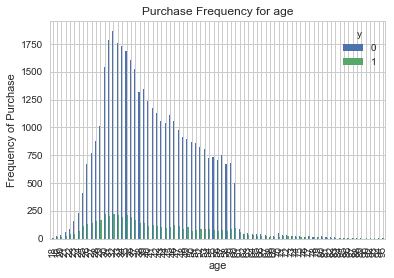

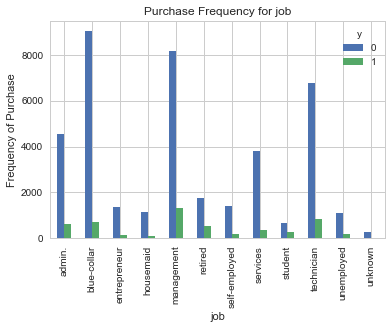

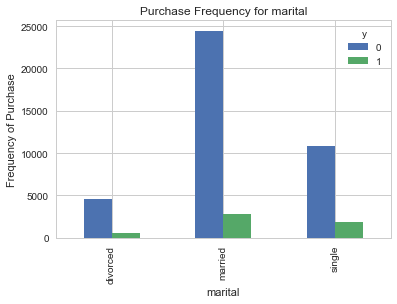

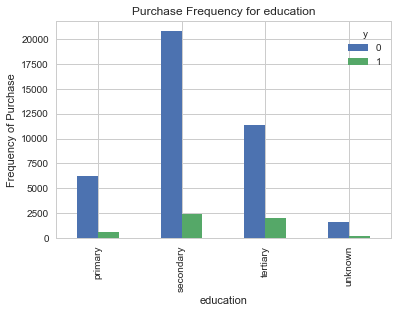

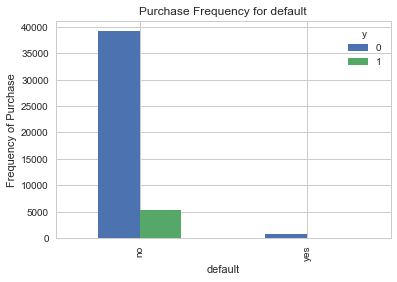

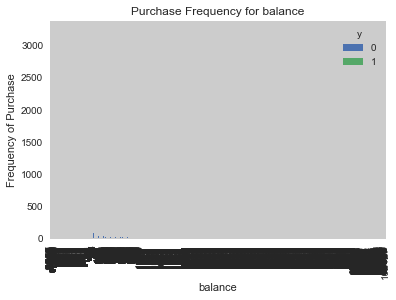

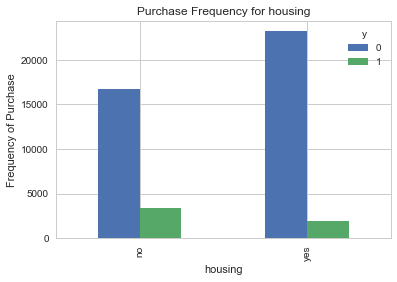

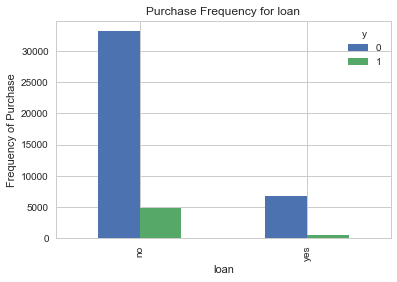

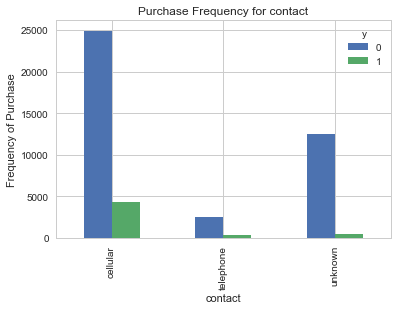

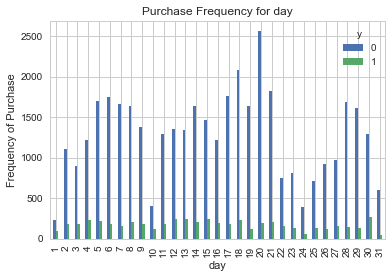

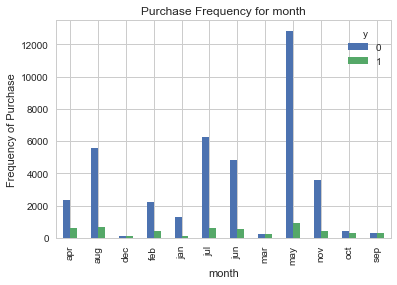

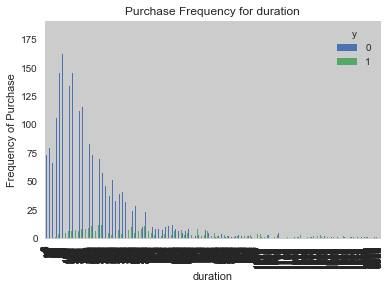

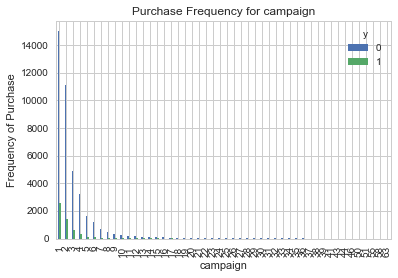

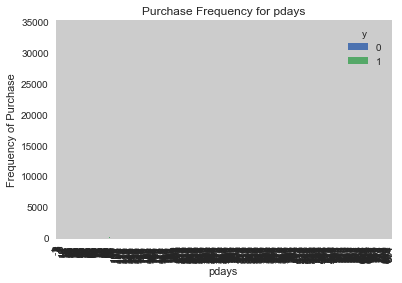

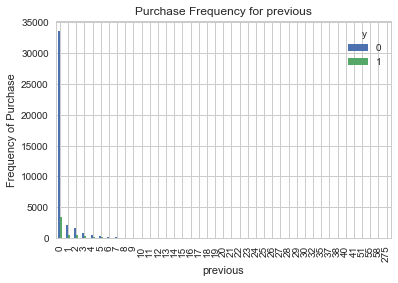

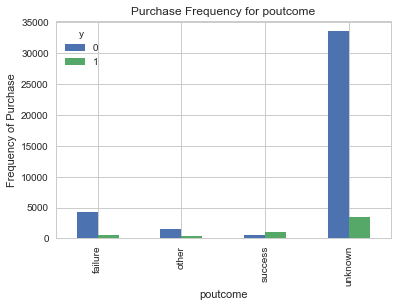

In [27]:
%matplotlib inline
for i in data.columns:
    if i!='y':
        pd.crosstab(data[i],data.y).plot(kind='bar')
        plt.title('Purchase Frequency for '+i)
        plt.xlabel(i)
        plt.ylabel('Frequency of Purchase')
        plt.show()
    


In [28]:
data1 = data
data = pd.get_dummies(data1)
print(data.shape)
print(data.columns)
data.head()

(45211, 52)
Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')


,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [29]:
import statsmodels.api as sm

X = data.iloc[:,data.columns!='y']
y = data.iloc[:,data.columns=='y']

model = sm.Logit(y,X)
model = model.fit()
model.summary2()

         Current function value: 0.238463
         Iterations: 35


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:1092: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                  Results: Logit
==================================================================================
Model:                     Logit                 Pseudo R-squared:      0.339     
Dependent Variable:        y                     AIC:                   21648.2702
Date:                      2019-04-26 22:47      BIC:                   22023.1913
No. Observations:          45211                 Log-Likelihood:        -10781.   
Df Model:                  42                    LL-Null:               -16315.   
Df Residuals:              45168                 LLR p-value:           0.0000    
Converged:                 0.0000                Scale:                 1.0000    
No. Iterations:            35.0000                                                
----------------------------------------------------------------------------------
                     Coef.    Std.Err.      z    P>|z|      [0.025       0.975]   
----------------------------------------------------------------------------------
age                  0.0001       0.0022  0.0511 0.9592       -0.0042       0.0044
balance              0.0000       0.0000  2.4934 0.0127        0.0000       0.0000
day                  0.0100       0.0025  3.9929 0.0001        0.0051       0.0149
duration             0.0042       0.0001 64.9852 0.0000        0.0041       0.0043
campaign            -0.0908       0.0101 -8.9551 0.0000       -0.1107      -0.0709
pdays               -0.0001       0.0003 -0.3355 0.7373       -0.0007       0.0005
previous             0.0102       0.0065  1.5612 0.1185       -0.0026       0.0229
job_admin.           0.0678  817638.5794  0.0000 1.0000 -1602542.1001 1602542.2357
job_blue-collar     -0.2421  827199.5388 -0.0000 1.0000 -1621281.5461 1621281.0620
job_entrepreneur    -0.2893 1112393.2642 -0.0000 1.0000 -2180251.0238 2180250.4453
job_housemaid       -0.4362 1007805.6753 -0.0000 1.0000 -1975263.2632 1975262.3908
job_management      -0.0975 1100295.2224 -0.0000 1.0000 -2156539.1057 2156538.9108
job_retired          0.3202  804103.7197  0.0000 1.0000 -1576014.0103 1576014.6507
job_self-employed   -0.2305  624009.2051 -0.0000 1.0000 -1223035.7985 1223035.3374
job_services        -0.1560  927159.2545 -0.0000 1.0000 -1817198.9027 1817198.5907
job_student          0.4500  750424.9189  0.0000 1.0000 -1470805.3642 1470806.2641
job_technician      -0.1082  961502.4635 -0.0000 1.0000 -1884510.3077 1884510.0913
job_unemployed      -0.1089  804011.7643 -0.0000 1.0000 -1575834.2100 1575833.9922
job_unknown         -0.2454  146748.9182 -0.0000 1.0000  -287622.8399  287622.3490
marital_divorced    -0.3297          nan     nan    nan           nan          nan
marital_married     -0.5091          nan     nan    nan           nan          nan
marital_single      -0.2372          nan     nan    nan           nan          nan
education_primary   -0.4722 2890946.0440 -0.0000 1.0000 -5666150.5998 5666149.6553
education_secondary -0.2887 3083012.8897 -0.0000 1.0000 -6042594.5163 6042593.9389
education_tertiary  -0.0933 2999048.2329 -0.0000 1.0000 -5878026.6177 5878026.4311
education_unknown   -0.2218 3111749.8560 -0.0000 1.0000 -6098917.8684 6098917.4248
default_no          -0.5297  605413.8015 -0.0000 1.0000 -1186589.7764 1186588.7170
default_yes         -0.5464  603304.0739 -0.0000 1.0000 -1182454.8028 1182453.7101
housing_no          -0.2003  746876.3757 -0.0000 1.0000 -1463850.9976 1463850.5970
housing_yes         -0.8757  579729.7545 -0.0000 1.0000 -1136250.3153 1136248.5639
loan_no             -0.3253          nan     nan    nan           nan          nan
loan_yes            -0.7507          nan     nan    nan           nan          nan
contact_cellular     0.2369 1497392.3706  0.0000 1.0000 -2934834.8802 2934835.3539
contact_telephone    0.0735 1500322.6423  0.0000 1.0000 -2940578.2705 2940578.4175
contact_unknown     -1.3864 1504650.0600 -0.0000 1.0000 -2949061.3134 2949058.5406
m

In [30]:
model.pvalues.head()

age         9.592337e-01
balance     1.265134e-02
day         6.526075e-05
duration    0.000000e+00
campaign    3.392796e-19
dtype: float64

In [31]:
col = []
p = model.pvalues.tolist()
for i in range(len(p)):
    if p[i]<=0.05:
        col.append(data.columns[i])
col

['balance', 'day', 'duration', 'campaign']

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

X,y = data[col],data.y
Xtrn,Xtst,Ytrn,Ytst = train_test_split(X,y,test_size=0.3,random_state=0)

Model = LogisticRegression()
Model = Model.fit(Xtrn,Ytrn)

In [33]:
ypred = Model.predict(Xtst)

print("Real Observed")
print(Ytst.value_counts())

print("Observed by our Model")
q=pd.DataFrame(ypred,columns=['Prediction'])
q.Prediction.value_counts()

Real Observed
0    11969
1     1595
Name: y, dtype: int64
Observed by our Model


0    13118
1      446
Name: Prediction, dtype: int64

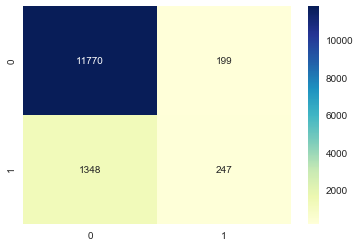

In [34]:
conf = confusion_matrix(Ytst,ypred)
sns.heatmap(conf,annot=True,fmt='g',cmap='YlGnBu')

In [42]:
from sklearn.metrics import *

print("Accuracy : ",metrics.accuracy_score(Ytst,ypred))
print("Precision:",metrics.precision_score(Ytst,ypred))
print("Recall:",metrics.recall_score(Ytst,ypred))
print("F1 Score:",metrics.f1_score(Ytst,ypred))

Accuracy :  0.8859480979062223
Precision: 0.5538116591928252
Recall: 0.15485893416927898
F1 Score: 0.24203821656050956
